In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
#import geopandas as gpd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np

import six
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import json

# Urbanização

In [4]:
urb = pd.read_csv("https://raw.githubusercontent.com/alletsc/MATOPIBA_economia_regional/master/dados/taxa_urbanizacao_estados.csv")
urb = urb.drop('Unnamed: 0', axis = 1)

<AxesSubplot:>

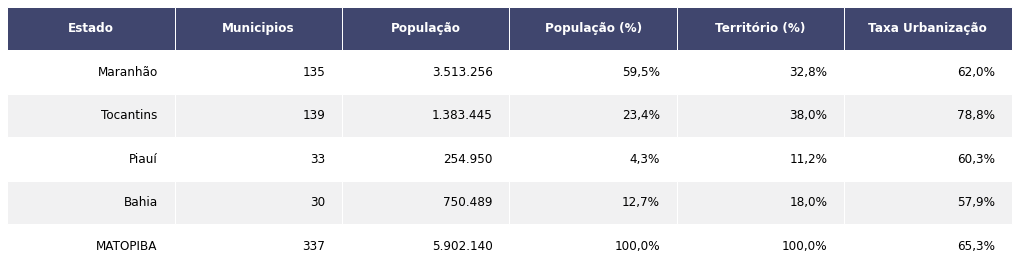

In [5]:
df = urb

def render_mpl_table(data, col_width=8, row_height=0.8, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], Edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(Edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=3.0)

# Municipios Exportadores

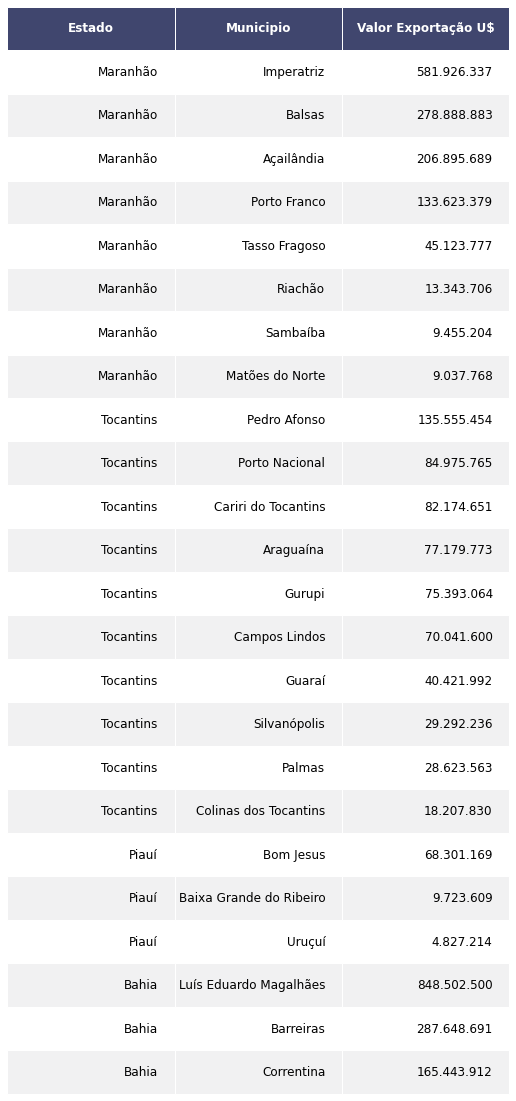

In [ ]:

municipios_exportadores = pd.read_csv('https://raw.githubusercontent.com/alletsc/MATOPIBA_economia_regional/master/dados/exportacao_municipios.csv')
municipios_exportadores = municipios_exportadores.drop('Unnamed: 0', axis = 1)
render_mpl_table(municipios_exportadores, header_columns=0, col_width=3.0)

# Localização Municipios Exportadores

In [ ]:
municipios_exportadores_loc = pd.read_csv('https://raw.githubusercontent.com/alletsc/MATOPIBA_economia_regional/master/dados/exportacao_municipio_long_lag.csv')
municipios_exportadores_loc = municipios_exportadores_loc.drop('Unnamed: 0', axis=1)
municipios_exportadores_loc

,MUNICIPIO,LAT,LONG,EXPORTAÇÃO U$
0,Imperatriz,-5.5255,-47.477,581.926.337
1,Balsas,-7.53292,-46.035,278.888.883
2,Açailândia,-4.95394,-47.5019,206.895.689
3,Porto Franco,-6.34131,-47.4016,133.623.379
4,Tasso Fragoso,-8.46798,-45.7573,45.123.777
5,Riachão,-7.36012,-46.6146,13.343.706
6,Sambaíba,-7.12823,-45.3406,9.455.204
7,Matões do Norte,-3.63076,-44.553,9.037.768
8,Pedro Afonso,-8.9715,-48.1754,135.555.454
9,Porto Nacional,-10.7075,-48.4143,84.975.765


In [ ]:
map = folium.Map(location=[-15.7952301, -47.8669117],
                              zoom_start = 13)
for index, linha in municipios_exportadores_loc.iterrows():
    folium.Marker(linha['LAT'], linha['LONG']).add_to(map)

# Renda população

In [ ]:
renda = pd.read_excel('renda_populacao.xls')
renda

In [ ]:
def render_mpl_table(data, col_width=8, row_height=0.8, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], Edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(Edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(renda, header_columns=0, col_width=3.0)